Lab05: Regularization Assignment
---
111062697 吳律穎

In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

讀入 dataset 並將原始 training set 分為 traing set 和 Validation set

In [39]:
# download the dataset
import pandas as pd
import numpy as np
import urllib.request
import os
from sklearn.model_selection import train_test_split

if not os.path.exists('data/'):
    os.mkdir('data/')

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

('./data/X_test.csv', <http.client.HTTPMessage at 0x7f8aac43a9d0>)

In [40]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [41]:
print(X_train)
print(y_train)

       PERIOD  GAME_CLOCK  SHOT_CLOCK  DRIBBLES  TOUCH_TIME  SHOT_DIST  \
37396       3         152        21.0         0         0.5        2.4   
74612       4         319         7.6         3         3.4       12.2   
75290       4         579         9.5         0         4.9       17.5   
82324       1         492         5.1         0         0.6       25.2   
35827       1         556        22.1         0         0.9       24.1   
...       ...         ...         ...       ...         ...        ...   
21243       1         667         5.8         0         0.6        1.7   
45891       4          46        17.3         2         1.6       12.8   
42613       1         235        22.8         2         2.3        2.6   
43567       2           9         4.5         0         0.9       24.6   
68268       4         680        13.1         2         1.5       10.8   

       PTS_TYPE  CLOSE_DEF_DIST  
37396         2             3.4  
74612         2             2.7  
75290    

### Requirements 1 :
Use all features to train any linear model in scikit-learn and try different hyperparameters (ex. different degree, complexity). Show their performances.

##### Ridge

In [42]:
from sklearn.linear_model import RidgeClassifier
import numpy as np

for i in [0, 1, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 1000]:
    clf = RidgeClassifier(alpha=i).fit(X_train, np.ravel(y_train))
    print("alpha: {:<3}, train_acc: {}, valid_acc: {}".format(i, clf.score(X_train, y_train), clf.score(X_valid, y_valid)))

alpha: 0  , train_acc: 0.6079800083298625, valid_acc: 0.6096556013371687
alpha: 1  , train_acc: 0.6079800083298625, valid_acc: 0.6096556013371687
alpha: 10 , train_acc: 0.6080299875052062, valid_acc: 0.6096556013371687
alpha: 15 , train_acc: 0.6080299875052062, valid_acc: 0.6096167301562622
alpha: 20 , train_acc: 0.6080133277800917, valid_acc: 0.6096167301562622
alpha: 30 , train_acc: 0.6079966680549771, valid_acc: 0.6096167301562622
alpha: 40 , train_acc: 0.6080466472303206, valid_acc: 0.6095389877944491
alpha: 50 , train_acc: 0.6080466472303206, valid_acc: 0.6095389877944491
alpha: 60 , train_acc: 0.6080466472303206, valid_acc: 0.6095389877944491
alpha: 70 , train_acc: 0.6080466472303206, valid_acc: 0.6095389877944491
alpha: 80 , train_acc: 0.6080466472303206, valid_acc: 0.6095001166135428
alpha: 90 , train_acc: 0.6080633069554352, valid_acc: 0.6095001166135428
alpha: 100, train_acc: 0.6080633069554352, valid_acc: 0.6095389877944491
alpha: 200, train_acc: 0.6080133277800917, valid_ac

小結： 在alpha為10時有最好的validation結果，當 alpha 更大時，也，雖然 training error 下降了，但 validation error 變大了

##### LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    clf = LogisticRegression(C=C, max_iter=1000)
    clf.fit(X_train, np.ravel(y_train))

    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)

    print(f'C = {C:5}, Training Acc: {train_accuracy:.10f}, Valid Acc: {valid_accuracy:.10f}')


C = 0.001, Training Acc: 0.6082798834, Valid Acc: 0.6095389878
C =  0.01, Training Acc: 0.6081632653, Valid Acc: 0.6095778590
C =   0.1, Training Acc: 0.6081965848, Valid Acc: 0.6096556013
C =     1, Training Acc: 0.6079800083, Valid Acc: 0.6092668895
C =    10, Training Acc: 0.6081466056, Valid Acc: 0.6097333437
C =   100, Training Acc: 0.6081632653, Valid Acc: 0.6096167302


小結： 在C為0.1時有最好的validation結果，當 C 更大時，雖然 training error 和 validation error 都變大了

##### SGDClassifier

In [44]:
from sklearn.linear_model import SGDClassifier

for i in [0.001, 0.01, 0.1, 1, 10]:
    clf = SGDClassifier(alpha=i)
    clf.fit(X_train, np.ravel(y_train))
    y_train_pred = clf.predict(X_train)
    y_valid_pred = clf.predict(X_valid)
    
    print("alpha: {:<7}, train_acc: {}, valid_acc: {}".format(i, accuracy_score(y_train, y_train_pred), accuracy_score(y_valid, y_valid_pred)))


alpha: 0.001  , train_acc: 0.4685381091211995, valid_acc: 0.4743061494208194
alpha: 0.01   , train_acc: 0.48666389004581423, valid_acc: 0.49296431625592785
alpha: 0.1    , train_acc: 0.5925531028738026, valid_acc: 0.5892871025421752
alpha: 1      , train_acc: 0.596268221574344, valid_acc: 0.5987716706833554
alpha: 10     , train_acc: 0.5921366097459392, valid_acc: 0.5935629324418876


小結： 在alpha為 1 時有最好的validation結果，當 alpha 更大時，training error 下降，但 validation error 變大了，有overfitting的現象

### Requirements 2 :
Select 1 setting (model + hyperparameters) and plot the error curve to show that the setting you selected isn't over-fit. \
我選了 RidgeClassifier 並把 alpha 設為 10，degree 設為 2，可以從途中看到沒有 overfit 的情形發生 

/home/s111062697/miniconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.23132e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/s111062697/miniconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.03619e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


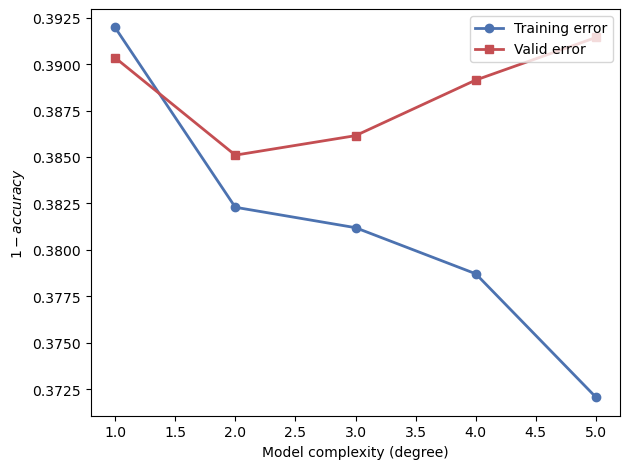

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from pylab import *

error_train = []
error_valid = []

for i in range(1, 6):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.fit_transform(X_valid)
    clf = RidgeClassifier(alpha=10).fit(X_train_poly, np.ravel(y_train))
    error_train.append(1 - clf.score(X_train_poly, y_train))
    error_valid.append(1 - clf.score(X_valid_poly, y_valid))

plt.plot(range(1, 6), error_train, 'bo-',label = 'Training error' , linewidth = 2)
plt.plot(range(1, 6), error_valid, 'rs-',label = 'Valid error', linewidth = 2)

plt.legend(loc='upper right')
plt.xlabel('Model complexity (degree)')
plt.ylabel('$1 - accuracy$')
plt.tight_layout()
plt.savefig('./output/Ridge-error-curve.png', dpi=300)
plt.show()

### Requirements 3 :
Use any method to choose the best 3 features that can best aid the model's prediction. Explain how you find it

- Feature selection
  - 用 Lasso 來 select features : Selected attributes: ['TOUCH_TIME' 'SHOT_DIST' 'CLOSE_DEF_DIST']

[-0.00000000e+00 -9.25856975e-06  3.91277558e-03 -0.00000000e+00
 -6.52556248e-03 -1.34518521e-02  0.00000000e+00  2.04527118e-02]


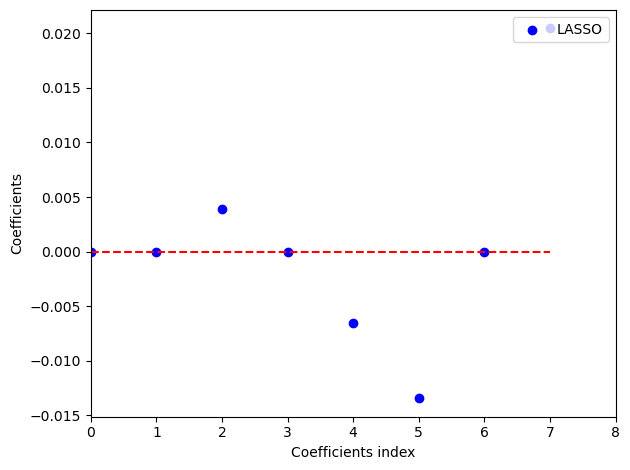

Selected attributes: ['TOUCH_TIME' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [46]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.01)
lr_lasso.fit(X_train, y_train)

print(lr_lasso.coef_)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,8)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 4e-3
idxs = np.where(abs(lr_lasso.coef_) > epsilon)

print('Selected attributes: {}'.format(X_train.columns.values[idxs]))

### Requirements 4 :
Train the model selected in 2. with the only 3 features selected in 3., and present the training error.

In [47]:
feature_select = ['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']

select_feature_train = X_train[feature_select]
select_feature_valid = X_valid[feature_select]

print(select_feature_train.head())
print(select_feature_valid.head())

train_error_train = []
valid_error_valid = []


poly = PolynomialFeatures(degree=2)
select_feature_X_train_poly = poly.fit_transform(select_feature_train)
select_feature_X_valid_poly = poly.fit_transform(select_feature_valid)
clf = RidgeClassifier(alpha=10).fit(select_feature_X_train_poly, np.ravel(y_train))
print()
print("Selected 3 features: ")
print("training error: {}, valid error: {}".format(1 - clf.score(select_feature_X_train_poly, y_train), 1 - clf.score(select_feature_X_valid_poly, y_valid)) )

       TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST
37396         0.5        2.4             3.4
74612         3.4       12.2             2.7
75290         4.9       17.5             4.6
82324         0.6       25.2             8.9
35827         0.9       24.1             5.1
       TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST
48595         1.8        5.6             3.6
33581         1.8       13.9             6.4
80254         0.8        3.2             0.0
15827         0.9       24.1             5.9
43292         3.0        4.4             1.7

Selected 3 features: 
training error: 0.3857725947521866, valid error: 0.38715696182850035


### Requirements 5 :
Export the predictions of the model trained in 4. for X_test (follow the format of y_train.csv).

In [48]:
feature_select = ['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']

select_feature_train = X_train[feature_select]
select_feature_test = X_test[feature_select]

print(select_feature_train.head())
print(select_feature_valid.head())

train_error_train = []


poly = PolynomialFeatures(degree=2)
select_feature_X_train_poly = poly.fit_transform(select_feature_train)
select_feature_X_test_poly = poly.fit_transform(select_feature_test)
clf = RidgeClassifier(alpha=10).fit(select_feature_X_train_poly, np.ravel(y_train))

y_pred = clf.predict(select_feature_X_test_poly)

df = pd.DataFrame(y_pred, columns=['FGM'])
df.to_csv('Lab05_111062697_y_pred.csv', index=False)

       TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST
37396         0.5        2.4             3.4
74612         3.4       12.2             2.7
75290         4.9       17.5             4.6
82324         0.6       25.2             8.9
35827         0.9       24.1             5.1
       TOUCH_TIME  SHOT_DIST  CLOSE_DEF_DIST
48595         1.8        5.6             3.6
33581         1.8       13.9             6.4
80254         0.8        3.2             0.0
15827         0.9       24.1             5.9
43292         3.0        4.4             1.7


### Requirements 6 :
A brief report of what you have done in this assignment.

如上 implementation 的流程：
- 將 training set 分割成 training set 和 validation set
- 嘗試各種 linear model，並比較不同參數的結果
- 選擇一種組合，並畫出 error curve 檢查是否有 overfitting
- 用 Lasso 來做 feature selection 選出 top 3 的 feature 並訓練前面選擇的 model
- 輸出 test set 的 predict 結果